Aqui importamos os módulos os e shutil, que são utilizados para manipular ficheiros e caminhos/diretórios.

Defenimos tamabém os caminhos das pastas, onde estão contidos os conjuntos/set's de treino, validação e teste.

In [ ]:
import os, shutil
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
train_dir = '../train'
validation_dir = '../validation'
test_dir = '../test'

Neste código seguinte, começamos por definir a variável IMG_SIZE. Tendo em conta que estamos a trabalhar com imagens de 32x32 pixeis, então, definimos essa mesma variável com o valor 32.

Criamos os conjuntos de dados de treino, validação e teste a partir dos respetivos diretórios. Assim, é especificado o caminho do diretório para cada um dos conjuntos anteriormente relatados.

O label_mode foi definido como categorical, tendo em conta que as etiquetas das imagens serão categóricas.

Posteriormente é definido o image_size, de forma a redimensionar todas as fotografias de input no respetivo conjunto, de forma a ter todas as fotografias do mesmo tamanho, sendo assim, se entrar na nossa rede uma fotografia 64x64, ela será redimensionada para o tamanho correto nesta fase.

Por fim, definimos o batch_size a 16, onde definimos o tamanho de cada "lote" de imagens. Definimos com este valor pois, apesar de tornar o treino da rede mais demorado e pesado, permitiu-nos obter os melhores valores de accuracy. Testámos a nossa rede com batch_size a 32, 64, 128 e 256, tendo sido o valor 16 a obter a melhor accuracy.

In [2]:
from keras.utils import image_dataset_from_directory
IMG_SIZE = 32
train_dataset = image_dataset_from_directory(train_dir,label_mode='categorical',image_size=(IMG_SIZE, IMG_SIZE),batch_size=16)
validation_dataset = image_dataset_from_directory(validation_dir,label_mode='categorical',image_size=(IMG_SIZE, IMG_SIZE),batch_size=16)
test_dataset = image_dataset_from_directory(test_dir,label_mode='categorical',image_size=(IMG_SIZE, IMG_SIZE),batch_size=16)

Found 40000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.


Nesta fase do nosso código tivemos de abdicar da cama densa com L2 devido a um problema de conversão por parte do modelo de h5 para json (tendo em conta a utilização do tensorflowjson), impedindo que o nosso modelo fosse, posteriormente, utilizado na nossa aplicação WEB.

In [3]:
from tensorflow import keras
from keras import layers
import tensorflow as tf

inputs = keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))

x = layers.Rescaling(1./255)(inputs)

x = layers.Conv2D(filters=32, kernel_size=3, activation="relu", padding='same')(inputs)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Dropout(0.2)(x)

x = layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Dropout(0.4)(x)

x = layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Dropout(0.4)(x)

x = layers.Conv2D(filters=256, kernel_size=3, activation="relu", padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Dropout(0.4)(x)

x = layers.Flatten()(x)
x = layers.Dense(512, activation="relu")(x)
#x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
#x = layers.Dense(64, activation="relu")(x)
#x = layers.Dense(64, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
#x = layers.Dense(16, activation="relu")(x)
outputs = layers.Dense(10, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['acc'])

In [4]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496 

In [5]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.00001)
history = model.fit(train_dataset, epochs=80, validation_data=validation_dataset, callbacks=[early_stopping, reduce_lr])

Epoch 1/80
2500/2500 [==============================] - 44s 17ms/step - loss: 1.8879 - acc: 0.3224 - val_loss: 1.7636 - val_acc: 0.3878 - lr: 0.0010
Epoch 2/80
2500/2500 [==============================] - 47s 19ms/step - loss: 1.5448 - acc: 0.4374 - val_loss: 1.3307 - val_acc: 0.5349 - lr: 0.0010
Epoch 3/80
2500/2500 [==============================] - 45s 18ms/step - loss: 1.3804 - acc: 0.5057 - val_loss: 1.3474 - val_acc: 0.5593 - lr: 0.0010
Epoch 4/80
2500/2500 [==============================] - 45s 18ms/step - loss: 1.2819 - acc: 0.5499 - val_loss: 1.1980 - val_acc: 0.5841 - lr: 0.0010
Epoch 5/80
2500/2500 [==============================] - 43s 17ms/step - loss: 1.1997 - acc: 0.5834 - val_loss: 1.0197 - val_acc: 0.6503 - lr: 0.0010
Epoch 6/80
2500/2500 [==============================] - 50s 20ms/step - loss: 1.1320 - acc: 0.6041 - val_loss: 0.8916 - val_acc: 0.7013 - lr: 0.0010
Epoch 7/80
2500/2500 [==============================] - 52s 21ms/step - loss: 1.0695 - acc: 0.6291 - val_l

In [6]:
val_loss, val_acc = model.evaluate(validation_dataset)
print('val_acc:', val_acc)
model.save('models/ModelS_without_dataAugmentation.h5')

625/625 [==============================] - 4s 7ms/step - loss: 0.4997 - acc: 0.8309
val_acc: 0.8309000134468079


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


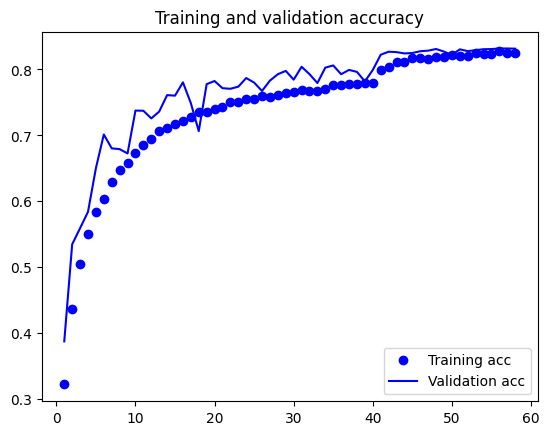

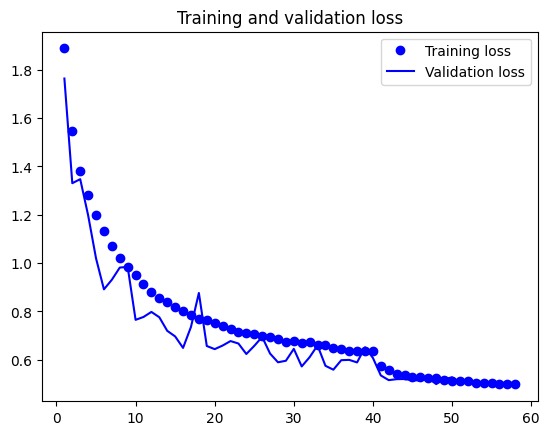

In [7]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

No seguinte bloco de código, é onde fazemos um predict depois do treino. Assim é feito o load do modelo em formato h5 após o respetivo treino. Após estar definido o caminho para as fotografias a serem utilizadas neste ponto, definimos também as label's das nossas classes e, por fim, apresentamos os resultados expectáveis do predicted vector e do probabilities vector. O vetor predicted mostra a classe a que corresponde a fotografia e o probabilities mostra as probabilidades da fotografia pertecer a uma dada classe. É de salientar que, neste ponto, utilizámos o seguinte ciclo for, de forma a fazer-mos um pequeno teste a cada classe do nosso projeto:
##### -> for label in labels:

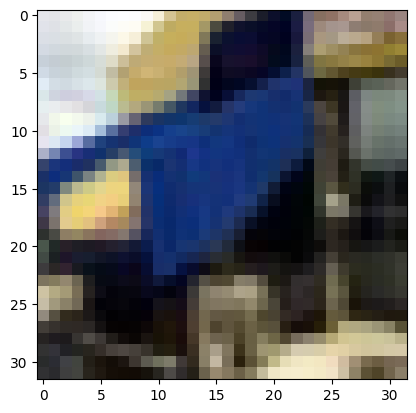

1/1 [==============================] - 0s 145ms/step
Predicted vector: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
Actual class: 009_truck ---- Predicted class: Truck
Predicted probabilities: [9.8680903e-04 2.1384035e-03 3.2812359e-03 2.2143539e-04 2.9395380e-06
 3.8290626e-05 1.8978750e-05 5.3543405e-04 6.6666769e-05 9.9270988e-01]


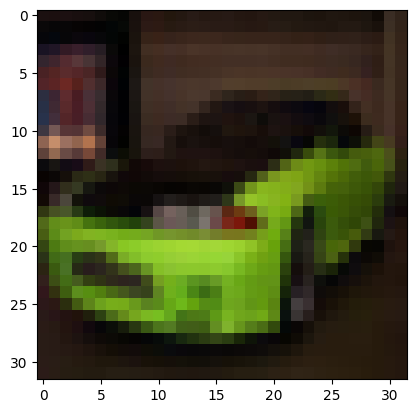

1/1 [==============================] - 0s 11ms/step
Predicted vector: [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
Actual class: 001_automobile ---- Predicted class: Automobile
Predicted probabilities: [2.0976597e-05 9.9677330e-01 1.0253464e-05 5.7722791e-06 2.1044934e-06
 4.0347568e-06 2.0754507e-03 7.4083073e-07 5.9462345e-05 1.0478117e-03]


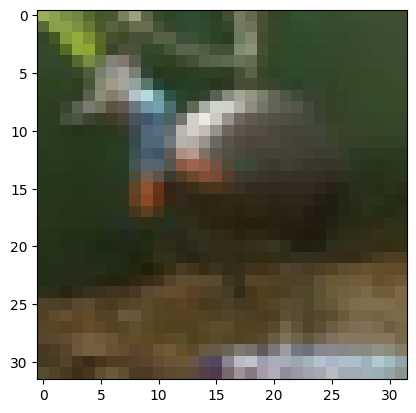

1/1 [==============================] - 0s 11ms/step
Predicted vector: [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
Actual class: 002_bird ---- Predicted class: Bird
Predicted probabilities: [3.1209551e-05 2.9161413e-07 9.6173459e-01 1.8051957e-03 3.4976602e-02
 5.9925421e-04 4.3366736e-04 4.1769826e-04 7.2376736e-07 6.6326868e-07]


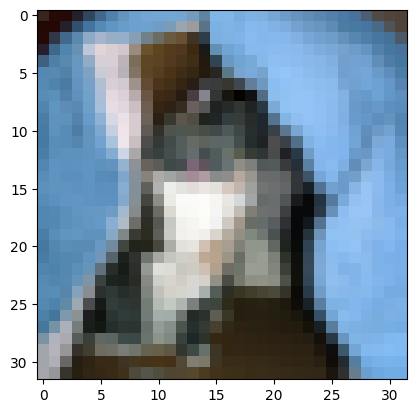

1/1 [==============================] - 0s 13ms/step
Predicted vector: [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
Actual class: 003_cat ---- Predicted class: Dog
Predicted probabilities: [1.26533804e-03 7.76810703e-06 8.11937172e-03 4.41934466e-01
 5.63549285e-04 5.39018691e-01 2.68905866e-03 6.24274602e-03
 5.42262242e-05 1.04798564e-04]


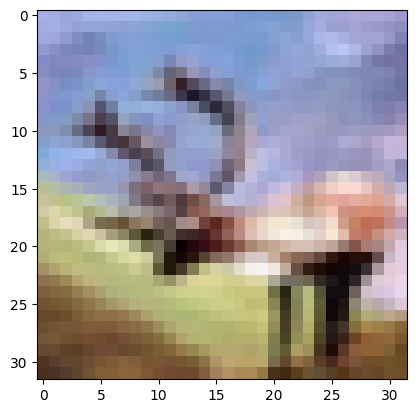

1/1 [==============================] - 0s 11ms/step
Predicted vector: [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
Actual class: 004_deer ---- Predicted class: Deer
Predicted probabilities: [3.2458510e-02 1.9473749e-05 4.8182304e-03 6.3991080e-05 9.6049172e-01
 1.6893837e-05 2.0866040e-05 5.5052235e-04 1.5197713e-03 3.9926075e-05]


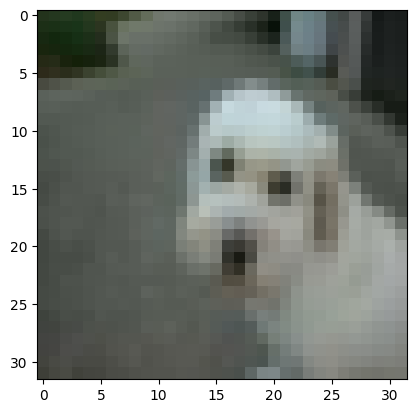

1/1 [==============================] - 0s 12ms/step
Predicted vector: [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
Actual class: 005_dog ---- Predicted class: Dog
Predicted probabilities: [4.4216090e-08 5.8826988e-10 7.2054798e-05 3.6873517e-04 6.7161141e-06
 9.9949312e-01 1.6461019e-07 5.9123198e-05 6.3272960e-09 3.0823681e-08]


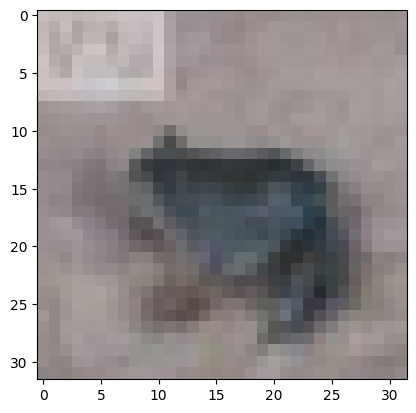

1/1 [==============================] - 0s 13ms/step
Predicted vector: [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
Actual class: 006_frog ---- Predicted class: Frog
Predicted probabilities: [4.6524496e-05 3.5450939e-06 4.9985619e-03 2.0373894e-02 8.5275271e-05
 1.8139175e-03 9.7263235e-01 8.5306169e-07 8.1292465e-06 3.6823425e-05]


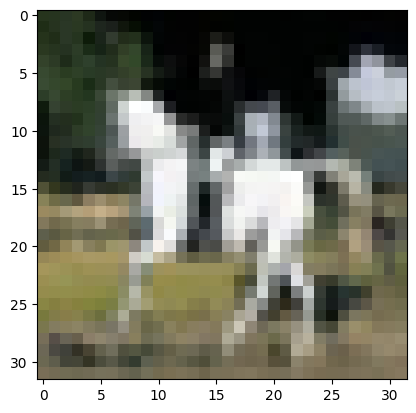

1/1 [==============================] - 0s 12ms/step
Predicted vector: [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
Actual class: 007_horse ---- Predicted class: Horse
Predicted probabilities: [1.3792141e-08 6.2040989e-12 6.8204372e-08 1.2917742e-06 8.2812303e-06
 9.3270712e-05 2.9715774e-10 9.9989700e-01 1.0410606e-10 1.5753846e-09]


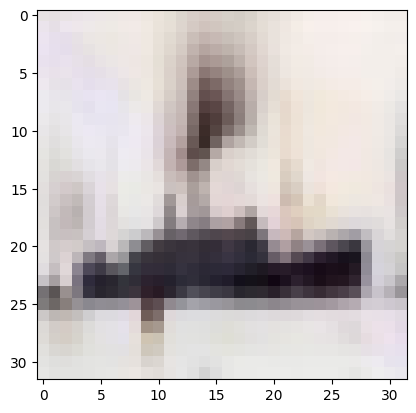

1/1 [==============================] - 0s 13ms/step
Predicted vector: [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
Actual class: 008_ship ---- Predicted class: Ship
Predicted probabilities: [1.3158190e-03 1.3566046e-04 3.7232232e-07 3.5179772e-07 2.5033276e-07
 5.8272892e-10 2.7902184e-08 1.9382432e-08 9.9145269e-01 7.0946799e-03]


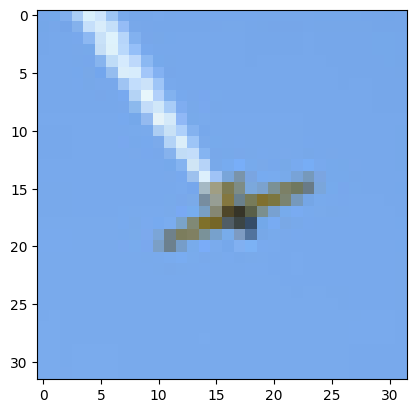

1/1 [==============================] - 0s 12ms/step
Predicted vector: [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Actual class: 000_airplane ---- Predicted class: Airplane
Predicted probabilities: [9.7241735e-01 8.3815763e-09 2.7442904e-02 5.8272605e-07 8.6159285e-05
 3.8036720e-08 8.1571778e-07 4.4699524e-09 5.2190062e-05 1.5592146e-08]


In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import random
from tensorflow import keras
import os

# Carrega o modelo salvo
model = keras.models.load_model('models/ModelS_without_dataAugmentation.h5')

# Função para prever a classe de uma imagem
def predict_image_class(label):
    # Diretório das imagens de treino
    img_dir = f'../train/{label}'
    
    # Lista de arquivos de imagem no diretório
    image_files = [f for f in os.listdir(img_dir) if f.endswith(('.png', '.jpg', '.jpeg'))]
    
    # Seleciona uma imagem aleatória da lista
    random_image = random.choice(image_files)
    img_path = os.path.join(img_dir, random_image)
    
    # Carrega e exibe a imagem
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
    plt.imshow(img)
    plt.show()
    
    # Prepara a imagem para a predição
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    
    # Realiza a predição
    predictions = model.predict(img_array)

    # Vetor de probabilidades estatísticas
    predicted_probabilities = predictions[0]
    
    # Determina a classe prevista
    predicted_class_index = np.argmax(predictions)
    
    # Vetor de predição
    predicted_vector = np.zeros_like(predictions)
    predicted_vector[0, predicted_class_index] = 1
    
    # Mapeamento de índices de classes para rótulos
    class_labels = {
        0: "Airplane",
        1: "Automobile",
        2: "Bird",
        3: "Cat",
        4: "Deer",
        5: "Dog",
        6: "Frog",
        7: "Horse",
        8: "Ship",
        9: "Truck"
    }
    
    # Obtém o rótulo da classe prevista
    predicted_label = class_labels[predicted_class_index]
    
    # Exibe os resultados
    print(f"Predicted vector: {predicted_vector}")
    print(f"Actual class: {label} ---- Predicted class: {predicted_label}")
    print(f"Predicted probabilities: {predicted_probabilities}")


# Lista de rótulos para prever
labels = ['009_truck', '001_automobile', '002_bird', '003_cat', '004_deer', '005_dog', '006_frog', '007_horse', '008_ship', '000_airplane']

# Realiza predições para cada rótulo na lista
for label in labels:
    predict_image_class(label)

Como principal extra do nosso projeto, para além do optimizer utilizado, tipos de data augmentation utilizados e outras funções que vão para além das utilizadas nas aulas, decidimos desenvolver um website que utiliza os modelos dos nossos notebook's. Assim, foi necessário utilizar o tensorflowjs_converter, que é uma biblioteca python, que permite converter o modelo de formato h5 para json, de forma a ser possível implementar a utilização do respetivo modelo no website. Posteriormente a este passo, e após termos o modelo em json, implementámos o código via JavaScript que faz a interligação entre o website e o modelo. O código JavaScript está disponível no ficheiro da diretoria ./web/main.js.

Para utilizar o nosso website, visto que não está publicado na web, é necessário instalar o VSCode e a respetiva externsão de live server, e correr o ficheiro index.html na diretoria ./web/index.html. A interação com a app web é simples, selecionar o tipo de modelo a ser utilizado, selecionar uma fotografia e realizar a operação de predict chamando o nosso modelo, por sua vez em json. Por fim, será apresentada uma label com a predicted class e também um gráfico de API Alphabet Google com as probabilidades para cada classe da nossa rede. O nosso website, permite também alternar entre tema claro e escuro, conforme a preferência do utilizador.

Assim, apresentamos um exemplo da interface web que podem esperar:

![GUI do website](../GUI.png "GUI do website")

Para gerir e trabalhar em grupo neste projeto, foi utilizado o software GitHub. O nosso repositório GitHub cumpre com toda a organização e logística que são essênciais para um projeto na nossa área. Para consulta deixamos o seguinte link (carregar em cima da fotografia do ícone do GitHub):

[![GitHub](../github-logo.png)](https://github.com/goncaloferreira966/Projeto_IA)]

### Powered By:
##### Gonçalo Ferreira, nº 2222051
##### José Delgado, nº 2222049